In [2]:
import pandas as pd
import sqlite3
data=pd.read_csv('./menu.csv')
conn=sqlite3.connect('Mcdonalds.db')
data.to_sql('MCDONALDS_NUTRITION',conn)

260

In [3]:
df=pd.read_sql("SELECT * FROM MCDONALDS_NUTRITION", conn)
df.head()

,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,...,31,10,4,17,3,17,10,0,25,15
1,1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,...,30,10,4,17,3,18,6,0,25,8
2,2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,...,29,10,4,17,2,14,8,0,25,10
3,3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,...,30,10,4,17,2,21,15,0,30,15
4,4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,...,30,10,4,17,2,21,6,0,25,10


In [6]:
df.describe(include="all")

,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,NaN,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Coffee & Tea,McFlurry with Reese's Peanut Butter Cups (Snack),16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,129.500000,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,75.199734,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,129.500000,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,194.250000,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


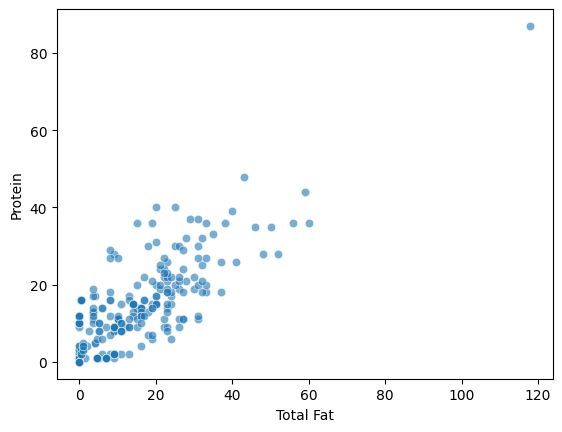

In [11]:
df["Protein"]=pd.to_numeric(df["Protein"], errors="coerce")
df["Total Fat"]=pd.to_numeric(df["Total Fat"], errors="coerce")

df["Protein"]=df["Protein"].round(1)
df["Total Fat"]=df["Total Fat"].round(1)

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="Total Fat",y="Protein",data=df, alpha=0.6)
plt.title=("Protein vs. Fat (McDonald's Items)")
plt.show()

In [5]:
df[(df["Protein"]>=25) & (df["Total Fat"]<=15)][["Item","Protein","Total Fat"]]

,Item,Protein,Total Fat
58,Premium Grilled Chicken Classic Sandwich,28,9.0
62,Premium Grilled Chicken Ranch BLT Sandwich,36,15.0
77,Premium McWrap Chicken Sweet Chili (Grilled Ch...,27,10.0
86,Premium Bacon Ranch Salad with Grilled Chicken,29,8.0
89,Premium Southwest Salad with Grilled Chicken,27,8.0


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


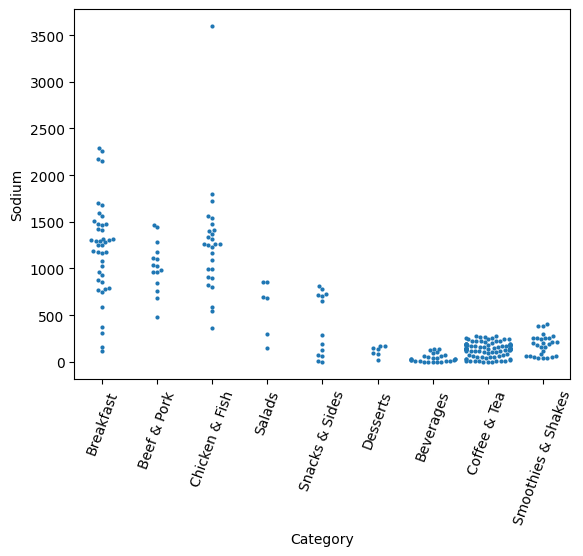

In [19]:
sns.swarmplot(x="Category",y="Sodium", data=df, size=3)
plt.xticks(rotation=70)
plt.title=("Sodium Content")
plt.show()

In [4]:
df[df["Sodium"]>2000][["Item","Sodium"]].sort_values(by="Sodium",ascending=False)

,Item,Sodium
82,Chicken McNuggets (40 piece),3600
34,Big Breakfast with Hotcakes and Egg Whites (La...,2290
32,Big Breakfast with Hotcakes (Large Biscuit),2260
33,Big Breakfast with Hotcakes and Egg Whites (Re...,2170
31,Big Breakfast with Hotcakes (Regular Biscuit),2150
